In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import joblib

Required libraries and dependencies are imported.

In [80]:
df=pd.read_csv('Glass Identification.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [81]:
df.shape

(213, 11)

The above dataset has 213 rows and 11 columns out of which 1 column is the target variable.

In [82]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

We can see that there are no null values in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


There are two types of values in the dataset: float and integer datatypes.

<Axes: >

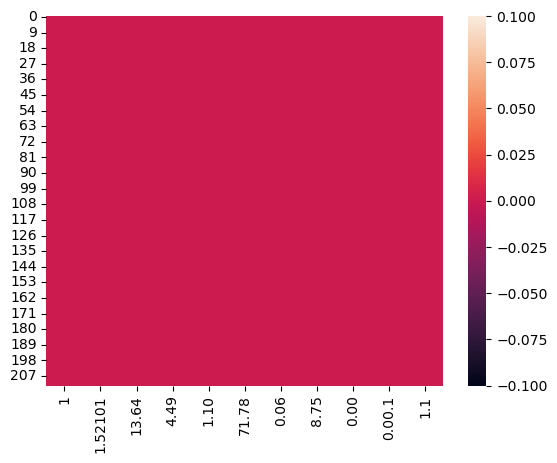

In [7]:
sns.heatmap(df.isnull())

# Attribute Information:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass:(class attribute)
    1.   Building_windows_float_processed
    2.   Building_windows_non_float_processed
    3.   Vehicle_windows_float_processed
    4.   Vehicle_windows_non_float_processed
    5.   Containers
    6.   Tableware
    7.   Headlamps


In [84]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
df['glass_type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [85]:
df=df.drop('Id',axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This gives the statistical summary of the dataset. There are no negative values present in the summary.

From the above statistical summary, we can observe the following:
1. Using the describe method We can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.
2. The counts of all the columns are the same which means there are no missing values in the dataset.
3. The mean value is equal to the median (50%) value in most of the columns which means data is normally skewed for most of the columns.
4. There are no huge differences between 75% and maximum values for most of the columns. There are less outliers present in the data.
5. There is huge gap between 75% and maximum value of Ca column.

## Data Visualization

<Axes: xlabel='glass_type', ylabel='count'>

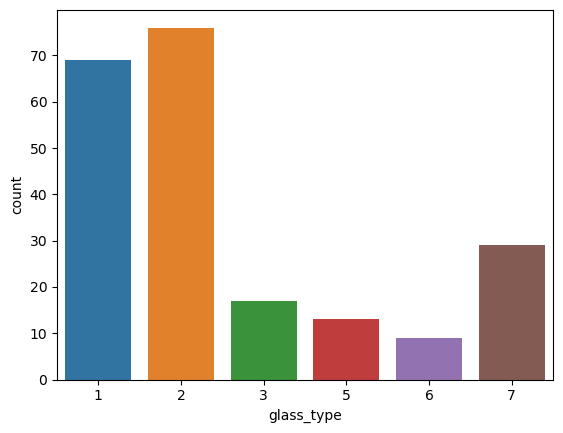

In [15]:
sns.countplot(x='glass_type', data=df)

We can see that the glass type 2 has the highest count in the dataset

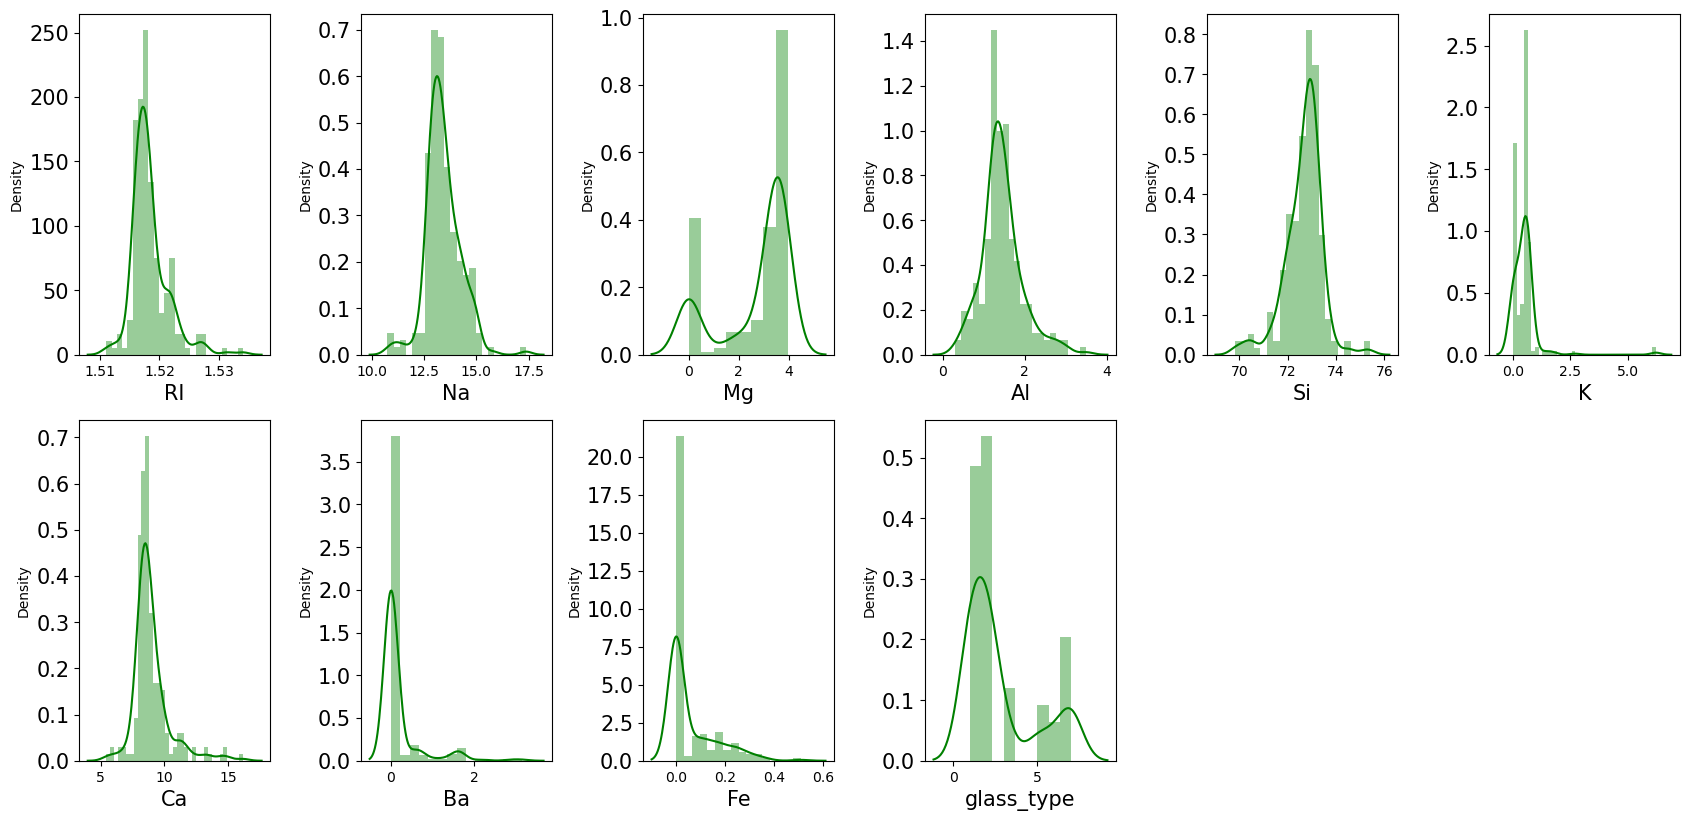

In [22]:
plt.figure(figsize=(17,20))
p=1
for col in df.columns:
    if p<=11:
        a=plt.subplot(5,6,p)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)
    p+=1
plt.tight_layout()

With the help of the above visualization, we can see that the data is normally skewed for most of the columns.

<Axes: xlabel='glass_type', ylabel='RI'>

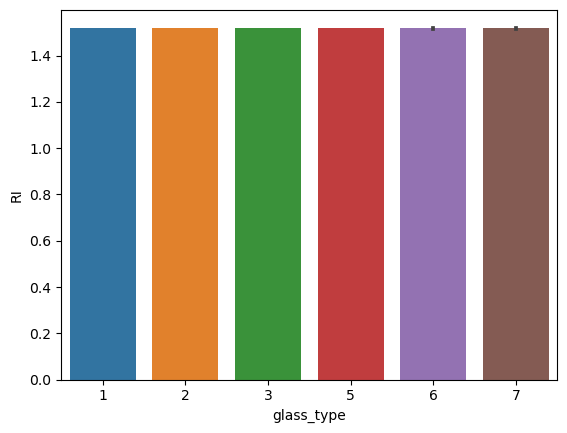

In [23]:
sns.barplot(x='glass_type',y='RI',data=df)

We can see that the Refractive Index of the glass(RI) remains equal for all the types.

<Axes: xlabel='glass_type', ylabel='Na'>

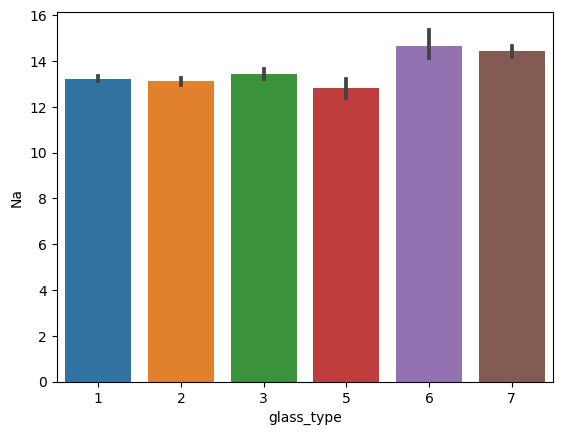

In [24]:
sns.barplot(x='glass_type',y='Na',data=df)

We can see that the quantity of Na in the glass is equal for almost all of the glass types.

<Axes: xlabel='glass_type', ylabel='Mg'>

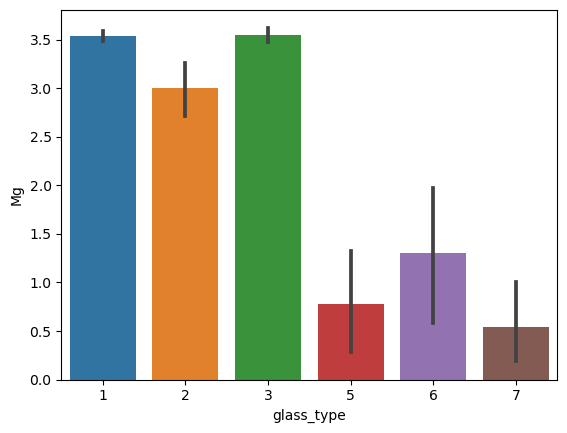

In [25]:
sns.barplot(x='glass_type',y='Mg',data=df)

There is no fixed pattern between glass type and the quantity of Mg.

<Axes: xlabel='glass_type', ylabel='Al'>

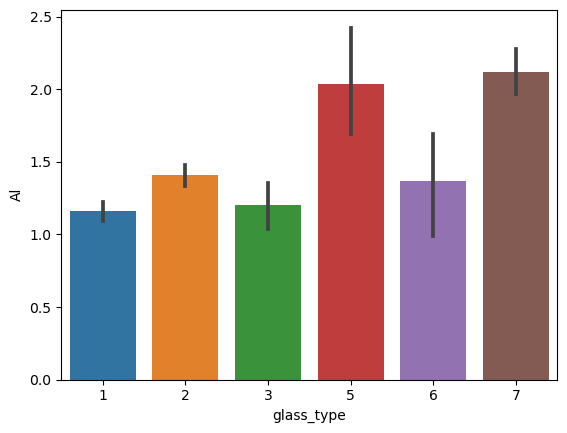

In [26]:
sns.barplot(x='glass_type',y='Al',data=df)

There is no fixed pattern between glass type and the quantity of Al.

<Axes: xlabel='glass_type', ylabel='Si'>

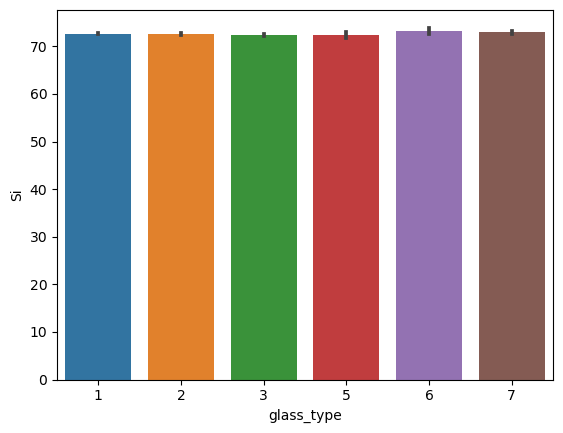

In [27]:
sns.barplot(x='glass_type',y='Si',data=df)

We can see that the quantity of Si remains equal for all the glass types.

<Axes: xlabel='glass_type', ylabel='K'>

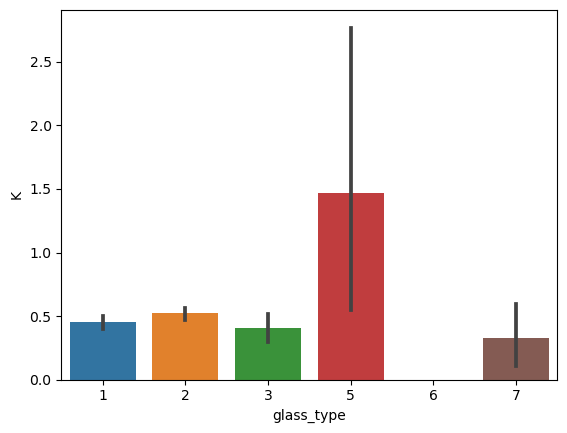

In [28]:
sns.barplot(x='glass_type',y='K',data=df)

There is no fixed pattern between the quantity of K and the glass types but it seems to appear that there is low quantity of K in all the glass types compared to other elements.

<Axes: xlabel='glass_type', ylabel='Ca'>

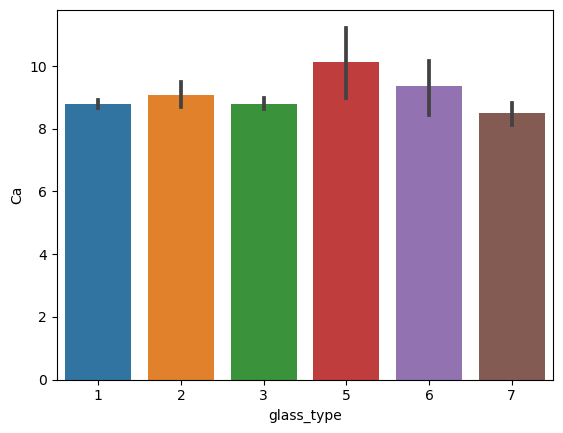

In [29]:
sns.barplot(x='glass_type',y='Ca',data=df)

There is no fixed pattern between the quantity of Ca and the glass types.

<Axes: xlabel='glass_type', ylabel='Ba'>

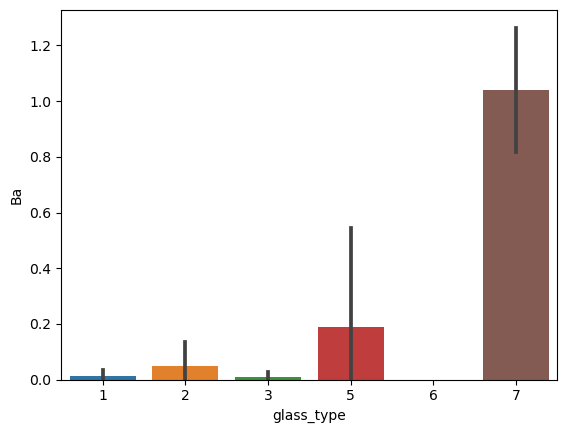

In [30]:
sns.barplot(x='glass_type',y='Ba',data=df)

It seems to appear that there are low quantities of Ba in all the glass types except for the glass type 7.

<Axes: xlabel='glass_type', ylabel='Fe'>

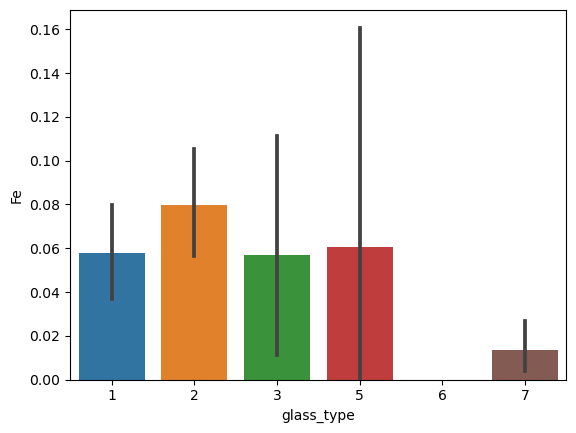

In [31]:
sns.barplot(x='glass_type',y='Fe',data=df)

There is no fixed pattern between the quantity of Fe and the glass types but it seems to appear that the glass type 6 doesn't have Fe at all.

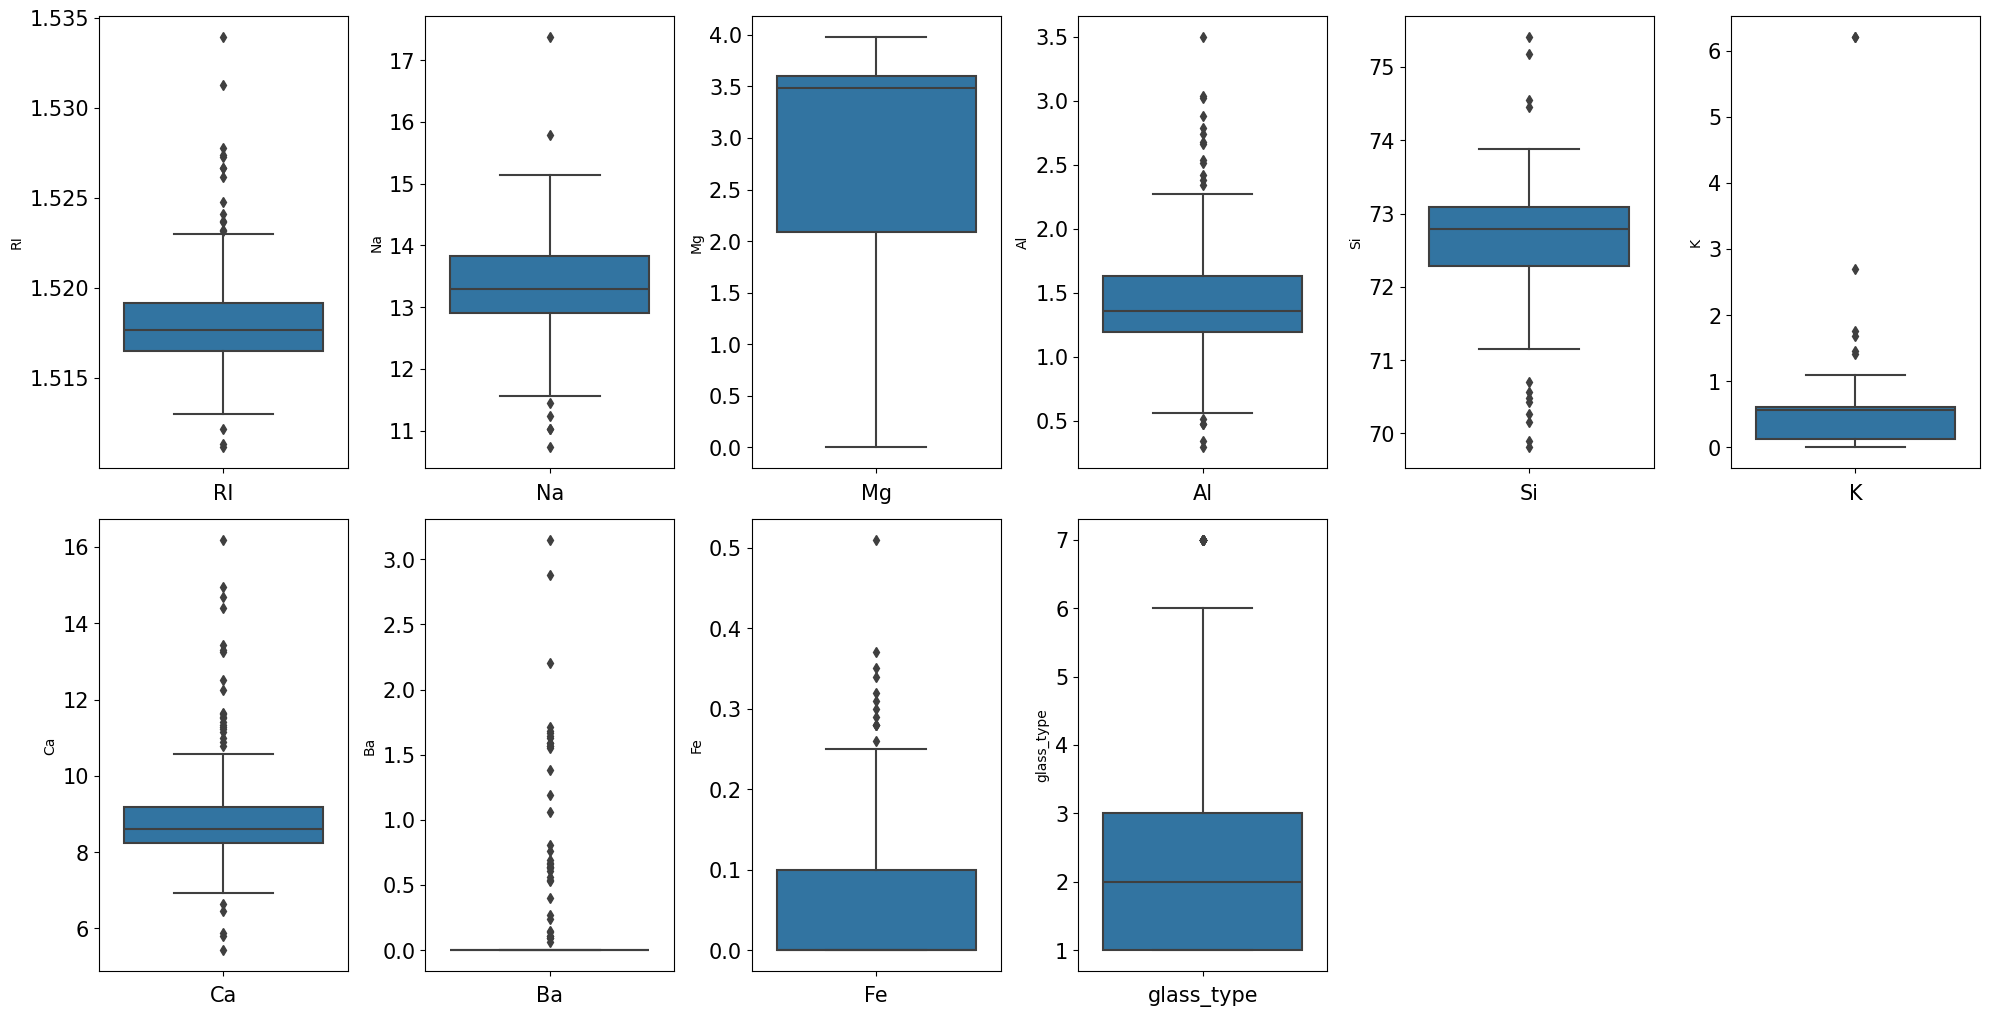

In [86]:
plt.figure(figsize=(20,25))
p=1
for col in df.columns:
    if p<=11:
        a=plt.subplot(5,6,p)
        sns.boxplot(y=df[col],data=df)
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)
    p+=1
plt.tight_layout()

We can see that there are many outliers present in Ca, Ba columns from the above boxplot visualization.

In [34]:
df.skew()

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.108861
dtype: float64

## Removing Outliers using ZScore

In [37]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [38]:
df.shape

(193, 10)

<Figure size 2000x2500 with 0 Axes>

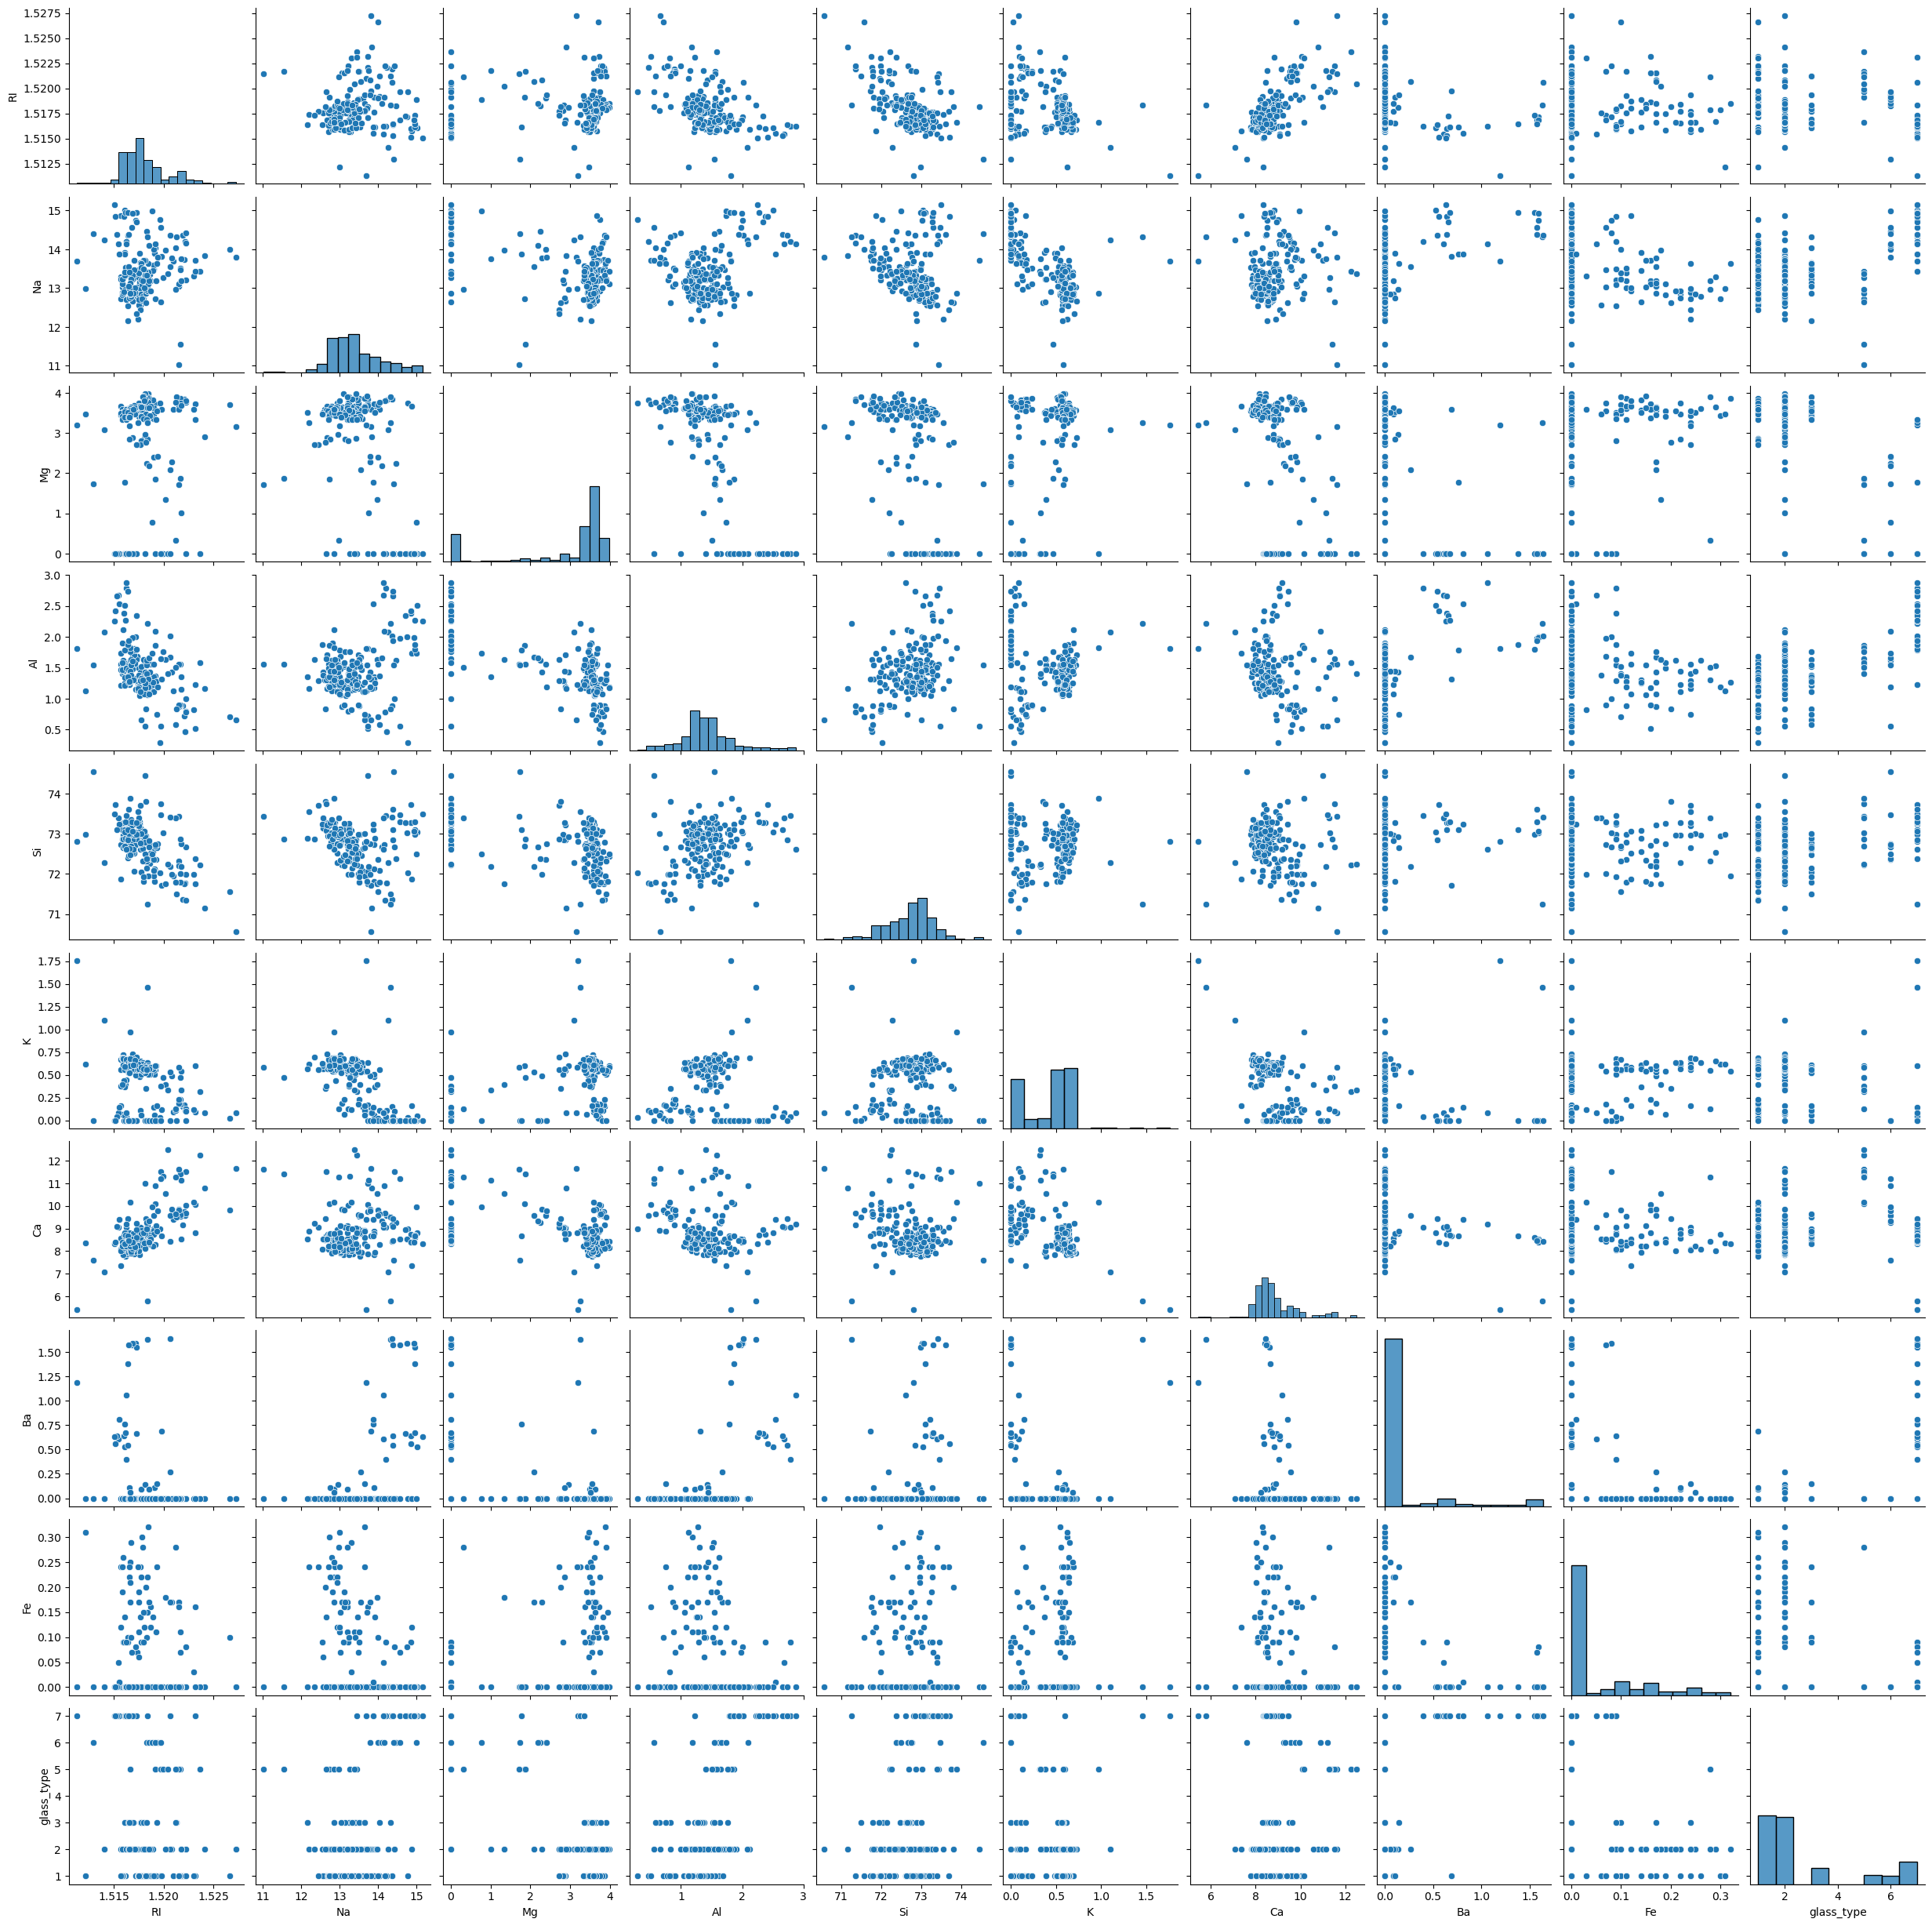

In [41]:
plt.figure(figsize=(20,25))
sns.pairplot(data=df)
plt.show()

In [42]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,0.048762,0.040224,-0.520285,-0.604910,-0.362609,0.694174,-0.191584,-0.016095,-0.162981
Na,0.048762,1.000000,-0.491934,0.254805,-0.233588,-0.612858,0.020123,0.532913,-0.209057,0.535440
Mg,0.040224,-0.491934,1.000000,-0.591948,-0.371123,0.495241,-0.456909,-0.586867,0.138597,-0.809747
Al,-0.520285,0.254805,-0.591948,1.000000,0.331868,0.000847,-0.213887,0.531651,-0.120321,0.659242
Si,-0.604910,-0.233588,-0.371123,0.331868,1.000000,0.062254,-0.167478,0.153207,0.018382,0.257640
K,-0.362609,-0.612858,0.495241,0.000847,0.062254,1.000000,-0.503380,-0.257401,0.095794,-0.391378
Ca,0.694174,0.020123,-0.456909,-0.213887,-0.167478,-0.503380,1.000000,-0.168033,-0.011883,0.154708
Ba,-0.191584,0.532913,-0.586867,0.531651,0.153207,-0.257401,-0.168033,1.000000,-0.121189,0.682676
Fe,-0.016095,-0.209057,0.138597,-0.120321,0.018382,0.095794,-0.011883,-0.121189,1.000000,-0.205058
glass_type,-0.162981,0.535440,-0.809747,0.659242,0.257640,-0.391378,0.154708,0.682676,-0.205058,1.000000


Feature Scaling

In [43]:
x=df.drop('glass_type', axis=1)
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [45]:
y=df['glass_type']
y.value_counts()

glass_type
1    69
2    68
7    23
3    16
5     9
6     8
Name: count, dtype: int64

In [46]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [47]:
y.value_counts()

glass_type
1    69
2    69
3    69
5    69
6    69
7    69
Name: count, dtype: int64

Finding the best random state

In [48]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is: ',maxAccu,'at random state ',maxRS)

Best Accuracy is:  0.963855421686747 at random state  40


Splitting the data into training data and testing data

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

Logistic Regression

In [51]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8433734939759037
[[11  5  1  0  0  0]
 [ 2  6  1  0  0  0]
 [ 0  4  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.40      0.67      0.50         9
           3       0.82      0.69      0.75        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.84        83
   macro avg       0.84      0.83      0.83        83
weighted avg       0.87      0.84      0.85        83



Support Vector Classification

In [52]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.891566265060241
[[12  5  0  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  3 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.92      0.71      0.80        17
           2       0.50      0.89      0.64         9
           3       1.00      0.77      0.87        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.89        83
   macro avg       0.90      0.89      0.88        83
weighted avg       0.93      0.89      0.90        83



Decision Tree Classification

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8795180722891566
[[11  3  2  0  0  1]
 [ 2  7  0  0  0  0]
 [ 0  1 12  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  1  0  0 14  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.58      0.78      0.67         9
           3       0.86      0.92      0.89        13
           5       1.00      1.00      1.00        14
           6       1.00      0.93      0.97        15
           7       0.94      1.00      0.97        15

    accuracy                           0.88        83
   macro avg       0.87      0.88      0.87        83
weighted avg       0.89      0.88      0.88        83



KNeighbor Classification

In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8554216867469879
[[11  3  3  0  0  0]
 [ 3  4  2  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  1  0  0  0 14]]
              precision    recall  f1-score   support

           1       0.79      0.65      0.71        17
           2       0.50      0.44      0.47         9
           3       0.72      1.00      0.84        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      0.93      0.97        15

    accuracy                           0.86        83
   macro avg       0.83      0.84      0.83        83
weighted avg       0.86      0.86      0.85        83



Random Forest Classification

In [55]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9518072289156626
[[14  2  1  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.93      0.82      0.87        17
           2       0.80      0.89      0.84         9
           3       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.95        83
   macro avg       0.94      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83



Extra Trees Classification

In [56]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.963855421686747
[[15  2  0  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       0.80      0.89      0.84         9
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.97      0.96      0.96        83



Gradient Boosting Classification

In [57]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9156626506024096
[[13  4  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 2  1 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.64      1.00      0.78         9
           3       1.00      0.77      0.87        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.92        83
   macro avg       0.92      0.92      0.91        83
weighted avg       0.93      0.92      0.92        83



AdaBoost Classification

In [58]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.30120481927710846
[[ 0 16  0  0  1  0]
 [ 0  9  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  0  0 15  0]
 [ 0 14  0  0  0  1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.14      1.00      0.24         9
           3       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        14
           6       0.94      1.00      0.97        15
           7       1.00      0.07      0.12        15

    accuracy                           0.30        83
   macro avg       0.35      0.34      0.22        83
weighted avg       0.36      0.30      0.22        83



Bagging Classifier

In [59]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.9156626506024096
[[14  2  1  0  0  0]
 [ 2  6  1  0  0  0]
 [ 0  1 12  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.67      0.67      0.67         9
           3       0.86      0.92      0.89        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.92        83
   macro avg       0.90      0.90      0.90        83
weighted avg       0.92      0.92      0.92        83



Cross Validation Scores:

In [60]:
s=cross_val_score(lg,x,y)
print(s)
print(s.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predlg)-s.mean())

[0.80722892 0.75903614 0.84337349 0.81927711 0.87804878]
0.8213928886276815
Difference between accuracy score and cross validation score:  0.021980605348222215


In [61]:
s1=cross_val_score(svc,x,y)
print(s1)
print(s1.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predsvc)-s1.mean())

[0.78313253 0.81927711 0.8313253  0.84337349 0.87804878]
0.8310314428445489
Difference between accuracy score and cross validation score:  0.06053482221569206


In [62]:
s2=cross_val_score(dtc,x,y)
print(s2)
print(s2.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,preddtc)-s2.mean())

[0.80722892 0.81927711 0.86746988 0.79518072 0.79268293]
0.8163679106670585
Difference between accuracy score and cross validation score:  0.06315016162209808


In [63]:
s3=cross_val_score(knn,x,y)
print(s3)
print(s3.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predknn)-s3.mean())

[0.81927711 0.86746988 0.85542169 0.80722892 0.84146341]
0.8381722009991185
Difference between accuracy score and cross validation score:  0.017249485747869442


In [64]:
s4=cross_val_score(rfc,x,y)
print(s4)
print(s4.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predrfc)-s4.mean())

[0.87951807 0.8313253  0.90361446 0.81927711 0.87804878]
0.8623567440493682
Difference between accuracy score and cross validation score:  0.08945048486629437


In [65]:
s5=cross_val_score(etc,x,y)
print(s5)
print(s5.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predetc)-s5.mean())

[0.87951807 0.84337349 0.90361446 0.81927711 0.90243902]
0.8696444313840729
Difference between accuracy score and cross validation score:  0.0942109903026741


In [66]:
s6=cross_val_score(gbc,x,y)
print(s6)
print(s6.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predgbc)-s6.mean())

[0.81927711 0.84337349 0.91566265 0.8313253  0.81707317]
0.8453423449897149
Difference between accuracy score and cross validation score:  0.07032030561269464


In [67]:
s7=cross_val_score(abc,x,y)
print(s7)
print(s7.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predabc)-s7.mean())

[0.31325301 0.3373494  0.34939759 0.36144578 0.31707317]
0.3357037907728475
Difference between accuracy score and cross validation score:  -0.03449897149573905


In [68]:
s8=cross_val_score(bc,x,y)
print(s8)
print(s8.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predbc)-s8.mean())

[0.85542169 0.81927711 0.89156627 0.79518072 0.87804878]
0.847898912724067
Difference between accuracy score and cross validation score:  0.06776373787834256


KNN is chosen as it has the least difference.

Hyperparameter tuning using GridSearchCV

In [70]:
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [78]:
best_knn=KNeighborsClassifier(metric='manhattan',n_neighbors=4, weights='distance')
best_knn.fit(x_train,y_train)
predbknn=best_knn.predict(x_test)
print(accuracy_score(y_test,predbknn))
print(confusion_matrix(y_test,predbknn))
print(classification_report(y_test,predbknn))

0.9036144578313253
[[12  2  3  0  0  0]
 [ 2  6  1  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.75      0.67      0.71         9
           3       0.76      1.00      0.87        13
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15

    accuracy                           0.90        83
   macro avg       0.90      0.90      0.89        83
weighted avg       0.91      0.90      0.90        83



In [79]:
final_model=best_knn
filename="GlassIDFinal.pkl"
joblib.dump(final_model,filename)

['GlassIDFinal.pkl']